In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load Dataset
data=pd.read_csv('./mtcars.csv')
data.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [3]:
data2=data.drop('model',axis=1)
data2.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

In [4]:
#Show Key Statistics
data2.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [5]:
# Overview of Dataset Characteristics
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [6]:
#Summary of N/A Values
data2.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

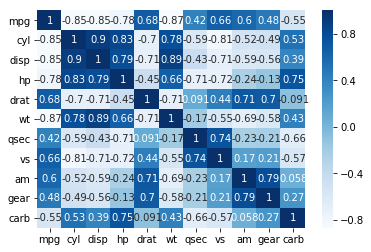

In [7]:
#Visualization of Correlations
import seaborn as sns
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

In [8]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2.drop('mpg',axis=1),0.8)
print('Correlated columns:',col)    

Correlated columns: {'vs', 'disp', 'wt', 'hp'}


In [9]:
#Define x and y variable
x = data2.drop('mpg',axis=1).values
y = data2['mpg'].values

In [10]:
#Load Library for Training Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [11]:
#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train,y_train)
    predict = method.predict(x_test)

print('Method: %s' %name)   

#Coefficents
print('Intercept: %.2f'% method.intercept_)
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('mpg',axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#MAE,MSE and RMSE

print('R2: %.2f'% r2_score(y_test, predict) )
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error(y_test, predict))  
print('Mean Squared Error: %.2f'% metrics.mean_squared_error(y_test, predict))  
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(y_test, predict))) 

Method: Linear regression
Intercept: -15.78
      Coefficients
cyl       1.066970
disp      0.008457
hp       -0.004587
drat      3.013895
wt       -2.461549
qsec      0.853503
vs       -0.135095
am        1.903771
gear      4.078364
carb     -1.932864
R2: 0.30
Mean Absolute Error: 2.54
Mean Squared Error: 18.47
Root Mean Squared Error: 4.30


In [12]:
#Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Linear Model
lm2=LinearRegression()
param_grid = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
lm2_model = GridSearchCV(lm2, param_grid, cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

#SGD Model
sgd = SGDRegressor(max_iter=1000,random_state=100)
param_gridsgd = {'loss': ["squared_loss","huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
          'penalty':["none", "l2", "l1", "elasticnet"],
          'alpha':[0.001, 0.0001, 0.00001]}
sgd_model = GridSearchCV(sgd, param_gridsgd,cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

grids = [lm2_model,sgd_model] 
grid_dict = {0:'LinearReg', 1:'SGD'}

#Model Creation
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Optimized Models') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: %s' % grid_dict[idx]) 
     #Fit grid search
     optmodel.fit(x_train, y_train) 
     #Best params 
     print('Best params: %s' % optmodel.best_params_) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test) 
     # Test data accuracy of model with best params    
     print('R2: %.2f'% r2_score(y_test, y_pred3))
     print('Intercept: %.2f'% optmodel.best_estimator_.intercept_)
     coeff_table=pd.DataFrame(np.transpose(optmodel.best_estimator_.coef_),data2.drop('mpg',axis=1).columns,
                              columns=['Coefficients'])
     print(coeff_table)
     print('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred3))  
     print('Mean Squared Error: %0.2f'% metrics.mean_squared_error(y_test, y_pred3))  
     print('Root Mean Squared Error: %0.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))  

Optimized Models

Estimator: LinearReg
Best params: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
R2: 0.51
Intercept: 0.00
      Coefficients
cyl       0.435142
disp      0.007184
hp       -0.007941
drat      1.888977
wt       -2.427544
qsec      0.553489
vs       -0.286469
am        1.722108
gear      3.377115
carb     -1.615876
Mean Absolute Error: 2.32
Mean Squared Error: 13.01
Root Mean Squared Error: 3.61

Estimator: SGD
Best params: {'alpha': 1e-05, 'loss': 'huber', 'penalty': 'l2'}
R2: 0.36
Intercept: 0.09
      Coefficients
cyl       0.262019
disp     -0.050853
hp        0.013907
drat      0.388465
wt       -0.156018
qsec      1.235444
vs        0.049672
am        0.324991
gear      0.508551
carb     -0.237776
Mean Absolute Error: 3.31
Mean Squared Error: 16.91
Root Mean Squared Error: 4.11


In [13]:
#Prediction Dataset
                   
raw_data = {'cyl':[6],'dist':[200],'hp':[175],'drat':[3.00],'wt':[2.800],'qsec':[17.00],
            'vs':[1],'am':[0],'gear':[4],'carb':[4]}

dfnew=pd.DataFrame(raw_data, columns = ['cyl', 'dist', 'hp', 'drat', 'wt', 'qsec',
                                      'vs','am','gear','carb'])

dfnew

cyl  dist   hp  drat   wt  qsec  vs  am  gear  carb
0    6   200  175   3.0  2.8  17.0   1   0     4     4

In [14]:
#Prediction
print("Predicted mpg - Linear Model: %0.2f" % lm2_model.predict(dfnew))
print("Predicted mpg - SGD Model: %0.2f" % sgd_model.predict(dfnew))

Predicted mpg - Linear Model: 17.70
Predicted mpg - SGD Model: 16.79
